In [2]:
try: reloaded = importlib.reload(Jupytils)
except: import Jupytils
showTopbar('''PyMC3 Examples''')
pd.options.display.float_format = '{:,.3f}'.format

import pymc3 as pymc3
from pymc3 import *
from scipy import optimize

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import pylab as pl

# Intialize random number generator
np.random.seed(123)
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]
# Size of dataset
size = 100
# Predictor variable
X1 = np.linspace(0, 1, size)
X2 = np.linspace(0,.2, size)
# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma


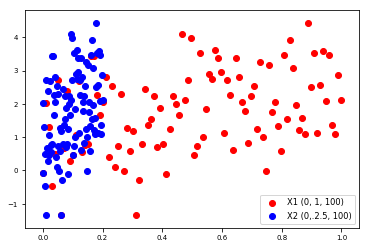

In [5]:
df=pd.DataFrame({'X1': X1, 'X2': X2, 'y': Y})
displayDFs(df, showIcons=True)

plt.scatter(X1,Y, c='r', label="X1 (0, 1, 100)")
plt.scatter(X2,Y, c='b', label="X2 (0,.2.5, 100)")
plt.legend();


<Container object of 2 artists>

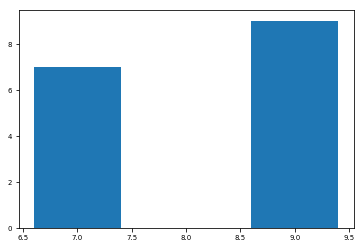

In [17]:
a="0 0 0 0 1 1 1 0 0 0  1 1 1 1 1 1".split()
x=pd.Series(a)
v=x.value_counts()
plt.bar(v, height=v)

#plt.bar(x, range(0, len(x)), color=['g'], alpha=0.1);

In [18]:
basic_model = Model()
with basic_model:
    # Priors for unknown model parameters
    alpha = Normal('alpha', mu=0, sd=10)
    beta = Normal('beta', mu=0, sd=10, shape=2)
    sigma = HalfNormal('sigma', sd=1)
    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2
    # Likelihood (sampling distribution) of observations
    Y_obs = Normal('Y_obs', mu=mu, sd=sigma, observed=Y)
    
    # obtain starting values via MAP
    start = find_MAP(fmin=optimize.fmin_powell)
    # instantiate sampler
    step = NUTS(scaling=start)
    # draw 2000 posterior samples
    trace = sample(10000, step, start=start)


logp = -164.5:   5%|▌         | 271/5000 [00:00<00:01, 4102.52it/s]


Optimization terminated successfully.
         Current function value: 164.496957
         Iterations: 6
         Function evaluations: 271


100%|██████████| 10500/10500 [00:35<00:00, 299.24it/s]


In [19]:
from scipy import optimize
map_estimate = find_MAP(model=basic_model, fmin=optimize.fmin_powell)
print(map_estimate)

logp = -164.5:   5%|▌         | 271/5000 [00:00<00:01, 4205.20it/s]

Optimization terminated successfully.
         Current function value: 164.496957
         Iterations: 6
         Function evaluations: 271
{'sigma_log__': array(0.11323001982290538), 'alpha': array(1.0176177899808136), 'sigma': array(1.1198895001091627), 'beta': array([ 1.51,  0.03])}


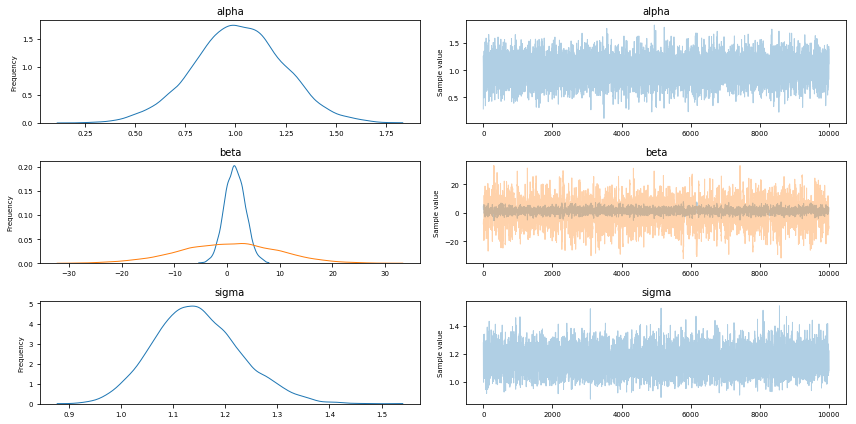

In [20]:
from pymc3 import traceplot
traceplot(trace);

In [22]:
from pymc3 import Model, Normal, HalfNormal

help(Normal)
import pymc3



Help on class Normal in module pymc3.distributions.continuous:

class Normal(pymc3.distributions.distribution.Continuous)
 |  Univariate normal log-likelihood.
 |  
 |  .. math::
 |  
 |     f(x \mid \mu, \tau) =
 |         \sqrt{\frac{\tau}{2\pi}}
 |         \exp\left\{ -\frac{\tau}{2} (x-\mu)^2 \right\}
 |  
 |  ========  ==========================================
 |  Support   :math:`x \in \mathbb{R}`
 |  Mean      :math:`\mu`
 |  Variance  :math:`\dfrac{1}{\tau}` or :math:`\sigma^2`
 |  ========  ==========================================
 |  
 |  Normal distribution can be parameterized either in terms of precision
 |  or standard deviation. The link between the two parametrizations is
 |  given by
 |  
 |  .. math::
 |  
 |     \tau = \dfrac{1}{\sigma^2}
 |  
 |  .. plot::
 |  
 |      import matplotlib.pyplot as plt
 |      import numpy as np
 |      import scipy.stats as st
 |      x = np.linspace(-5.0, 5.0, 1000)
 |      fig, ax = plt.subplots()
 |      f = lambda mu, sd : st.

In [17]:
from pandas_datareader import data
import pandas as pd

#returns = data.get_data_yahoo('SPY', start='2008-5-1', end='2009-12-1', )['Close'].pct_change()
#len(returns)

In [13]:
from pandas_datareader import get_data_yahoo
help (get_data_yahoo)

Help on function get_data_yahoo in module pandas_datareader.data:

get_data_yahoo(*args, **kwargs)

